<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Introduction" data-toc-modified-id="Introduction-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Introduction</a></span></li><li><span><a href="#Definitions" data-toc-modified-id="Definitions-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Definitions</a></span></li><li><span><a href="#Imports" data-toc-modified-id="Imports-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Imports</a></span></li><li><span><a href="#Information-gain" data-toc-modified-id="Information-gain-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Information gain</a></span></li><li><span><a href="#Comparison" data-toc-modified-id="Comparison-5"><span class="toc-item-num">5&nbsp;&nbsp;</span>Comparison</a></span></li><li><span><a href="#References" data-toc-modified-id="References-6"><span class="toc-item-num">6&nbsp;&nbsp;</span>References</a></span></li><li><span><a href="#Requirements" data-toc-modified-id="Requirements-7"><span class="toc-item-num">7&nbsp;&nbsp;</span>Requirements</a></span></li></ul></div>

# Introduction
<hr style="border:2px solid black"> </hr>

<div class="alert alert-warning">
<font color=black>

**What?** Classification loss functions

</font>
</div>

# Definitions
<hr style="border:2px solid black"> </hr>

<div class="alert alert-info">
<font color=black>

- **Information gain** is the reduction in entropy or surprise by transforming a dataset and is often used in training decision trees. Information gain is calculated by comparing the entropy of the dataset before and after a transformation.

- **Mutual information** calculates the statistical dependence between two variables and is the name given to information gain when applied to variable selection.
    
</font>
</div>

# Imports
<hr style="border:2px solid black"> </hr>

In [10]:
import numpy as np
from matplotlib import pyplot as plt
import pandas as pd
import seaborn as sns

# Information gain
<hr style="border:2px solid black"> </hr>

<div class="alert alert-info">
<font color=black>

- When growing a classification tree, we also use recursive binary splitting but, instead of evaluating the quality of a decision rule using the reduction of the mean-squared error, we can use the classification error rate, which is simply the fraction of the training samples in a given (leave) node that do not belong to the most common class.
- However, the alternative measures, Gini Index or Cross-Entropy, are preferred because they are more sensitive to node purity than the classification error rate. Node purity refers to the extent of the preponderance of a single class in a node. A node that only contains samples with outcomes belonging to a single class is pure and imply successful classification for this particular region of the feature space.
- Both the Gini Impurity and the Cross-Entropy measure take on smaller values when the class proportions approach zero or one, that is, when the child nodes become pure as a result of the split and are highest when the class proportions are even or 0.5 in the binary case.

</font>
</div>

# Comparison
<hr style="border:2px solid black"> </hr>

In [3]:
def entropy(f):
    return (-f*np.log2(f) - (1-f)*np.log2(1-f))/2

In [4]:
def gini(f):
    return 2*f*(1-f)

In [5]:
def misclassification_rate(f):
    return np.where(f<=.5, f, 1-f)

/var/folders/5x/lyqr8wv507n43bnwpsz4dq_c0000gn/T/ipykernel_5302/818124920.py:2: RuntimeWarning: divide by zero encountered in log2
  return (-f*np.log2(f) - (1-f)*np.log2(1-f))/2
/var/folders/5x/lyqr8wv507n43bnwpsz4dq_c0000gn/T/ipykernel_5302/818124920.py:2: RuntimeWarning: invalid value encountered in multiply
  return (-f*np.log2(f) - (1-f)*np.log2(1-f))/2


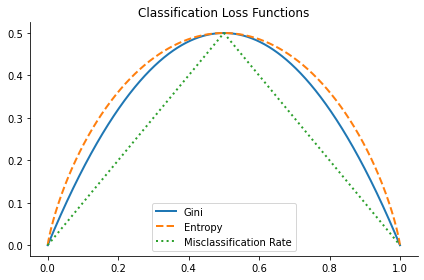

In [11]:
x = np.linspace(0, 1, 10000)
(pd.DataFrame({'Gini': gini(x), 
              'Entropy': entropy(x),
             'Misclassification Rate': misclassification_rate(x)}, index=x)
 .plot(title='Classification Loss Functions', lw=2, style=['-', '--', ':']))
sns.despine()
plt.tight_layout()

In [12]:
%%timeit
misclassification_rate(x)

19.1 µs ± 304 ns per loop (mean ± std. dev. of 7 runs, 100,000 loops each)


In [13]:
%%timeit
gini(x)

16.1 µs ± 247 ns per loop (mean ± std. dev. of 7 runs, 100,000 loops each)


In [14]:
%%timeit
entropy(x)

/var/folders/5x/lyqr8wv507n43bnwpsz4dq_c0000gn/T/ipykernel_5302/818124920.py:2: RuntimeWarning: divide by zero encountered in log2
  return (-f*np.log2(f) - (1-f)*np.log2(1-f))/2
/var/folders/5x/lyqr8wv507n43bnwpsz4dq_c0000gn/T/ipykernel_5302/818124920.py:2: RuntimeWarning: invalid value encountered in multiply
  return (-f*np.log2(f) - (1-f)*np.log2(1-f))/2


135 µs ± 1.84 µs per loop (mean ± std. dev. of 7 runs, 10,000 loops each)


# References
<hr style="border:2px solid black"> </hr>

<div class="alert alert-warning">
<font color=black>

- https://github.com/stefan-jansen/machine-learning-for-trading/blob/main/11_decision_trees_random_forests/01_decision_trees.ipynb

</font>
</div>

# Requirements
<hr style="border:2px solid black"> </hr>

In [3]:
%load_ext watermark
%watermark -v -iv -m

Python implementation: CPython
Python version       : 3.8.16
IPython version      : 8.3.0

Compiler    : Clang 14.0.6 
OS          : Darwin
Release     : 22.5.0
Machine     : x86_64
Processor   : i386
CPU cores   : 12
Architecture: 64bit

autopep8: 2.0.1
json    : 2.0.9

